In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('ds1_train.csv')
data_train

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
...,...,...,...
795,3.724697,23.219963,1.0
796,3.139055,5.970538,1.0
797,2.969095,20.249978,1.0
798,3.957531,27.261970,1.0


In [3]:
data_valid = pd.read_csv('ds1_valid.csv')
data_valid

,x_1,x_2,y
0,2.177396,78.630076,0.0
1,3.952131,123.541573,0.0
2,3.351176,47.752517,0.0
3,2.074934,26.997730,0.0
4,3.579775,226.703779,0.0
...,...,...,...
95,3.795618,11.708285,1.0
96,3.953480,7.320390,1.0
97,3.863524,26.396698,1.0
98,4.917294,102.078713,1.0


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
class Logistic_Regression:
    def __init__(self,learning_rate,iterations,X,y):        
        self._learning_rate = learning_rate
        self._iterations = iterations
        self._X = X.values
        self._t = y.values.reshape(-1,1)
        self._w = None
        self_X_new = None
    
    def create_attribute(self):
        one = np.ones((self._X.shape[0], 1))
        self._X_new = np.concatenate((one, self._X), axis = 1)
        self._w = np.ones([self._X_new.shape[1],1])
    
    def fit_model(self):
        self.create_attribute()
        for _ in range(self._iterations):
            y = sigmoid(np.dot(self._X_new, self._w ))
            loss_gradient = np.dot(self._X_new.T,y - self._t)
            self._w = self._w - self._learning_rate * loss_gradient
    def predict_model(self,X_test):
        # modify X_test
        X_test = X_test.values
        one = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((one, X_test), axis = 1)
        # predict
        self.fit_model()
        z_predict = np.dot(X_test,self._w)
        y_predict = sigmoid(z_predict)
        class_1 = y_predict[y_predict < 0.5]
        class_2 = y_predict[y_predict >= 0.5]
        return class_1,class_2,y_predict
    
    def accuracy(self,X_test,y_test):
        # % that y_test match with y_pred
        group = self.predict_model(X_test)
        y_pred = pd.DataFrame(group[2]).applymap(lambda x: 1 if x>= 0.5 else 0).astype(float)
        num_matches = (y_pred[0] == y_test).sum()
        total_obs = y_test.shape[0]
        return round((num_matches/total_obs),2)
        
        
    def plot_data(self,X_test):
        group = self.predict_model(X_test)
        plt.plot(group[0], 'ro',label = '0')
        plt.plot(group[1], 'bo',label = '1')
        plt.legend()
        plt.show()

In [6]:
model = Logistic_Regression(0.000001,1000000,data_train.iloc[:,:-1],data_train.iloc[:,-1])

In [7]:
import datetime as dt
before = dt.datetime.now()
group = model.predict_model(data_valid.iloc[:,:-1])
print(dt.datetime.now() - before)

0:00:30.340563


In [8]:
model.accuracy(data_valid.iloc[:,:-1], data_valid['y'])

0.9

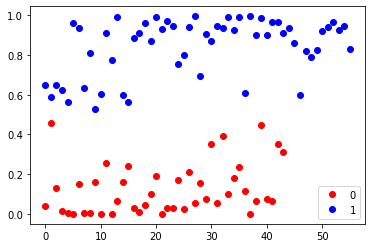

In [9]:
model.plot_data(data_valid.iloc[:,:-1])